## Computer Vision Basics

Import basic libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

Get image

--2020-07-26 23:29:50--  https://cdn3.volusion.com/artgw.hyvvw/v/vspfiles/photos/CB06904-6.jpg?v-cache=1565171767
Resolving cdn3.volusion.com (cdn3.volusion.com)... 151.101.1.38, 151.101.65.38, 151.101.129.38, ...
Connecting to cdn3.volusion.com (cdn3.volusion.com)|151.101.1.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140433 (137K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>] 137.14K  --.-KB/s    in 0.04s   

2020-07-26 23:29:50 (3.34 MB/s) - ‘img.jpg’ saved [140433/140433]

Dimension del array:  (500, 496, 3)
Tipo de dato:  uint8


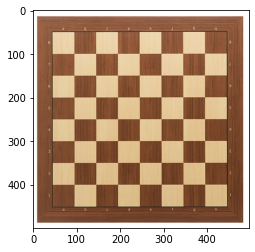

In [2]:
!wget -O img.jpg https://cdn3.volusion.com/artgw.hyvvw/v/vspfiles/photos/CB06904-6.jpg?v-cache=1565171767
img = cv2.imread('img.jpg')
print("Dimension del array: ", img.shape)
print("Tipo de dato: ", img.dtype)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

(500, 496)


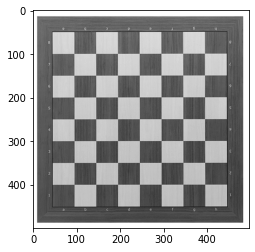

In [3]:
# Cambiamos el formato de la imagen a grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
print(gray.shape)
plt.imshow(gray, cmap='gray');

Definimos todos los filtros o kernels

In [4]:
kernels = [

    # Blur
    np.ones((7, 7), dtype="float") * (1.0 / (7 * 7)),

    np.ones((21, 21), dtype="float") * (1.0 / (21 * 21)),

    # Sharpen
    [[0, -1, 0],
	   [-1, 5, -1],
	   [0, -1, 0]],
    # Vertical edges
    [[0, 1, -1],
     [0, 1, -1],
     [0, 1, -1]],
    # Horizontal edges
    [[0, 0, 0],
     [1, 1, 1],
     [-1, -1, -1]],
    # Laplacian
    [[0, 1, 0],
	   [1, -4, 1],
	   [0, 1, 0]]
]


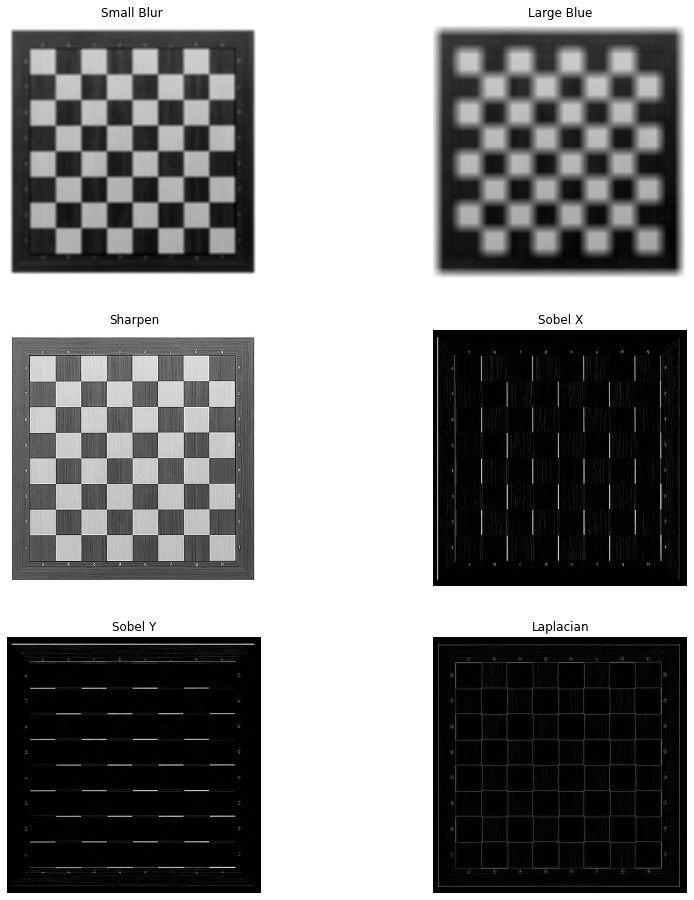

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(14, 16))
filter_names = ['Small Blur ', 'Large Blue', 'Sharpen', 'Sobel X', 'Sobel Y', 'Laplacian']

for filter, n, ax in zip(kernels, filter_names, axes.flatten()):
    img_convolved = cv2.filter2D(gray, -1,
        kernel=np.float32(filter))
    ax.imshow(img_convolved, cmap='gray')
    ax.set_title(n)
    ax.set_axis_off()

Descripciones

1. Small Blur : Hacer a una imagen borrosa
2. Large Blur : Hacer a una imagen mas borrosa aún.
3. Sharper : Mejora las estructuras de borde y otros detalles en nuestra imagen.
4. Sobel X : Permite capturar los bordes verticales.
5. Sovel Y : Permite capturar los bordes horizontales.
6. Laplacian : Resalta regiones de cambio rápido de intensidad y, por lo tanto, se puede usar para la detección de bordes.

Links

1. [How Kernel processes](https://setosa.io/ev/image-kernels/)
2. [Convolution Visualizer](https://ezyang.github.io/convolution-visualizer/index.html)